# Deep Learning Week 4 Natural Language Processing with Disaster Tweets

## Problem to Solve: Natural Language Processing with Disaster Tweets
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).
https://www.kaggle.com/c/nlp-getting-started/overview

## Data Source
The data was downloaded from the internet.
https://www.kaggle.com/c/nlp-getting-started/data

Data includes: 

A/ Train data

B/ Test data

## Deep Learning Methods Used
NLP: This is a powerful deep learning method to see if Tweets are classfied as Disaster.


# Table of Contents:
1. Import depencies or libraries that need to be used in this project
2. EDA step. Read the data from CVS file and Clean up data or reformat data for the purposes of the project
3. EDA step. Display plots for the input data
4. Apply NLP and display plots
5. Tunning and use different parameters to train the model
6. Apply NLP on the test data
7. Apply NLP on the test data
8. Takeaways

### 1. Import depencies or libraries that need to be used in this project


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Get the current working directory
current_dir = os.getcwd()
print("Current working directory:", current_dir)

# Path to test and train data
train_dir = os.path.join(current_dir, 'train.csv')
test_dir = os.path.join(current_dir, 'test.csv')
print("train_dir: ", train_dir)
print("test_dir: ", test_dir)

DEBUG_VERBOSE = False

Current working directory: /Volumes/WD5TBForMac-1/CU-Boulder-MSCS/Term4/DeepLearning/Week4
train_dir:  /Volumes/WD5TBForMac-1/CU-Boulder-MSCS/Term4/DeepLearning/Week4/train.csv
test_dir:  /Volumes/WD5TBForMac-1/CU-Boulder-MSCS/Term4/DeepLearning/Week4/test.csv


### 2. EDA step. Read the data from CVS file and check data to make sure they are qualified.

In [2]:
train_data = pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)

train_data['text'] = train_data['text'].astype(str)
test_data['text'] = test_data['text'].astype(str)

# show some sample data
print("Data before cleaning: ")
print(train_data.head())
print(train_data.describe())
print(train_data.info())
print(train_data.isnull().sum())

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower().strip()
    return text

train_data['text'] = train_data['text'].apply(clean_text)
test_data['text'] = test_data['text'].apply(clean_text)


train_data['text'] = train_data['text'].apply(clean_text)
test_data['text'] = test_data['text'].apply(clean_text)

# Check cleaned data
print("\n Data after cleaning: ")
print(train_data[['text']].head())
print(test_data[['text']].head())

Data before cleaning: 
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  -----

Discussions: From the data output, we can see that there are 7613 entires in the data ranging from 0 to 7613.
There is no missing value or column which is good for the training model.
Column id shows id of each entry while column target shows target type. 
The data has been cleaned up to remove non valid values.

### 3. EDA step. Display plots for the input data

A. Distribution Plot

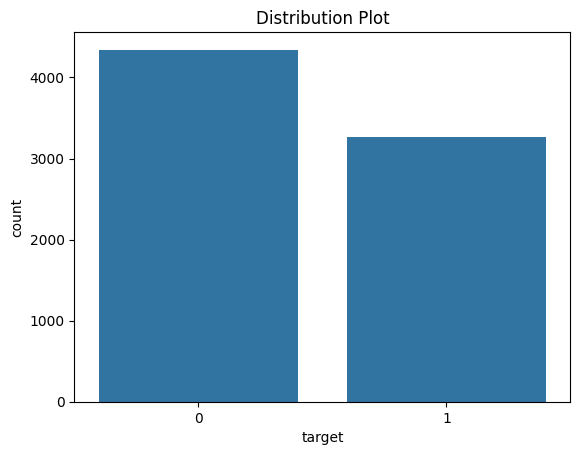

In [3]:
sns.countplot(x='target', data=train_data)
plt.title('Distribution Plot')
plt.show()
    

Discussions: The plot above shows data is pretty even between 0 and 1 which means we dont get bias results.

B. Show Images from training data input

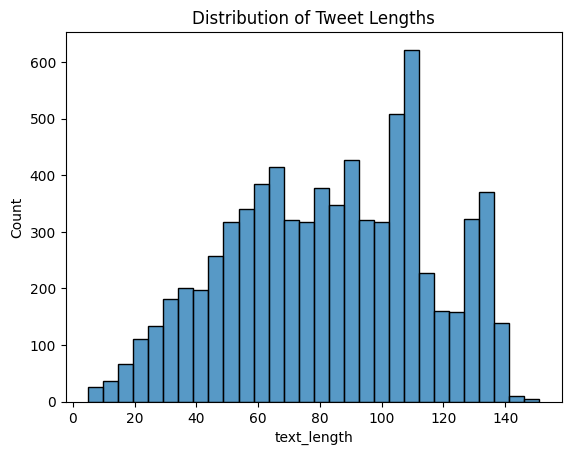

In [4]:
# Plot the length of tweets
train_data['text_length'] = train_data['text'].apply(len)
sns.histplot(train_data['text_length'], bins=30)
plt.title('Distribution of Tweet Lengths')
plt.show()

Discussions: Text length seems to be varied. There are different text lengths but most of them are from 40 to 140.

### 4. Apply NLP and display plots

#### A. Apply NLP on train data 

Plans: Apply the method with params such as:

1/ batch_size = 64 means each iteration will have 64 items

2/ epoch = 5 means the data will go through the training process 5 times

3/ dense and number of neurons mean how many layers and the number of nuerons in each layer.

4/ learning rate = 0.001

In [5]:
vectorizer_1000= TfidfVectorizer(max_features=1000)
X_train_1000 = vectorizer_1000.fit_transform(train_data['text'])
X_test_1000 = vectorizer_1000.transform(test_data['text'])
y_train = train_data['target']

model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128, input_length=X_train_1000.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train_1000.toarray(), y_train, epochs=5, batch_size=64, validation_split=0.2)

loss, accuracy = model.evaluate(X_train_1000.toarray(), y_train)
print(f"Train Loss: {loss}")
print(f"Train Accuracy: {accuracy}")



Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 722ms/step - accuracy: 0.5856 - loss: 0.6808 - val_accuracy: 0.5345 - val_loss: 0.6950
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 68s 711ms/step - accuracy: 0.5838 - loss: 0.6791 - val_accuracy: 0.5345 - val_loss: 0.6920
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 67s 702ms/step - accuracy: 0.5897 - loss: 0.6779 - val_accuracy: 0.5345 - val_loss: 0.6915
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 68s 711ms/step - accuracy: 0.5803 - loss: 0.6825 - val_accuracy: 0.5345 - val_loss: 0.6940
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 68s 713ms/step - accuracy: 0.5768 - loss: 0.6815 - val_accuracy: 0.5345 - val_loss: 0.6969
238/238 ━━━━━━━━━━━━━━━━━━━━ 29s 121ms/step - accuracy: 0.5968 - loss: 0.6744
Train Loss: 0.683954656124115
Train Accuracy: 0.5703402161598206


#### B. Display plots

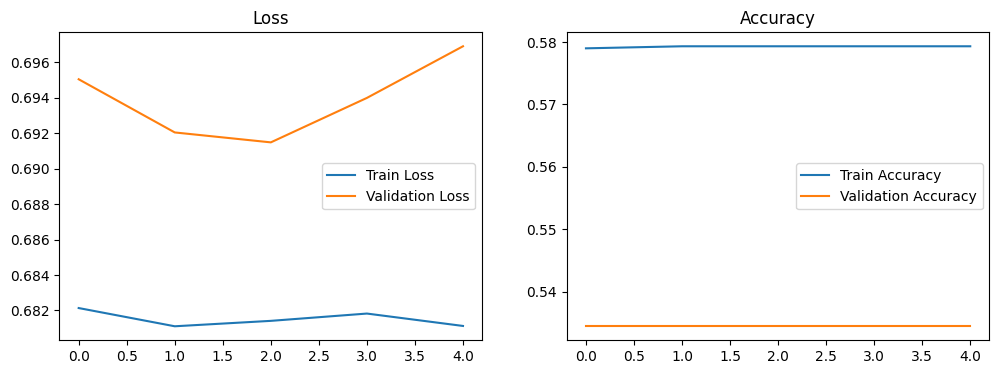

238/238 ━━━━━━━━━━━━━━━━━━━━ 29s 120ms/step - accuracy: 0.5968 - loss: 0.6744
Validation Loss: 0.683954656124115
Validation Accuracy: 0.5703402161598206


In [6]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# evaluate the model with validation values
val_loss, val_accuracy = model.evaluate(X_train_1000.toarray(), y_train)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Discussions: As epoch increments, we can see train loss and validation loss decrementing which show the models is being improved.

The train loss and accuracy are reaching their peaks which means they cant be improved much futher.

Validation loss and accuracy are stable but they are up and down which is normal.

For example:
This seems to be the peak
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 792ms/step - accuracy: 0.5757 - loss: 0.6823 - val_accuracy: 0.5345 - val_loss: 0.6952
238/238 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.5968 - loss: 0.6748

### 5. Tunning and use different parameters to train the model

#### A. Apply NLP with differemtn params

Plans: Apply the method with params such as:

1/ batch_size = 32 means each iteration will have 32 items

2/ epoch = 5 means how many times the data will go back and forth in the training process.

3/ dense and number of neurons mean how many layers and the number of nuerons in each layer are.

4/ learning rate = 0.01

5/ Use "LSTM"


In [7]:
vectorizer_8000= TfidfVectorizer(max_features=8000)
X_train_8000 = vectorizer_8000.fit_transform(train_data['text'])
X_test_8000 = vectorizer_8000.transform(test_data['text'])
y_train = train_data['target']

model = Sequential()
model.add(Embedding(input_dim=8000, output_dim=128, input_length=X_train_8000.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train_8000.toarray(), y_train, epochs=10, batch_size=128, validation_split=0.2)

loss, accuracy = model.evaluate(X_train_8000.toarray(), y_train)
print(f"Train Loss: {loss}")
print(f"Train Accuracy: {accuracy}")

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 602s 13s/step - accuracy: 0.5512 - loss: 0.6907 - val_accuracy: 0.5345 - val_loss: 0.7009
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 600s 13s/step - accuracy: 0.5781 - loss: 0.6832 - val_accuracy: 0.5345 - val_loss: 0.6930
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 603s 13s/step - accuracy: 0.5774 - loss: 0.6816 - val_accuracy: 0.5345 - val_loss: 0.6959
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 633s 13s/step - accuracy: 0.5793 - loss: 0.6808 - val_accuracy: 0.5345 - val_loss: 0.6912
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 612s 13s/step - accuracy: 0.5874 - loss: 0.6792 - val_accuracy: 0.5345 - val_loss: 0.6913
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 607s 13s/step - accuracy: 0.5793 - loss: 0.6820 - val_accuracy: 0.5345 - val_loss: 0.6938
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 601s 13s/step - accuracy: 0.5817 - loss: 0.6801 - val_accuracy: 0.5345 - val_loss: 0.6926
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 605s 13s/step - accuracy: 0.5806 - loss: 0.6811 - val_accuracy: 0.

#### B. Display Plots

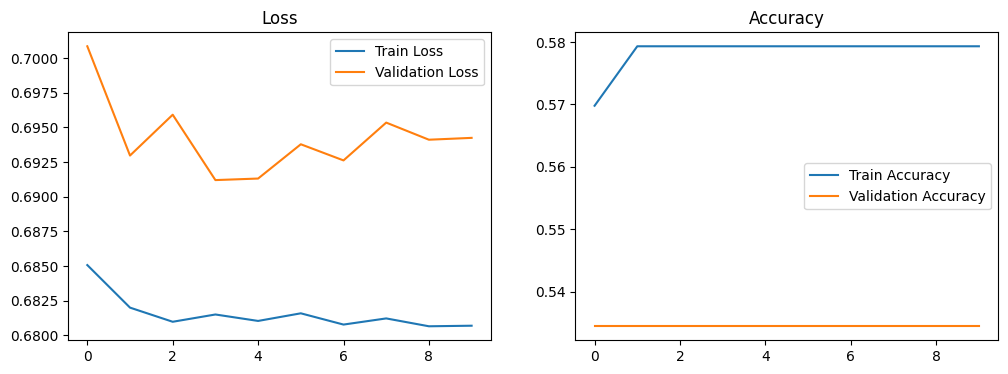

238/238 ━━━━━━━━━━━━━━━━━━━━ 229s 964ms/step - accuracy: 0.5968 - loss: 0.6752
Validation Loss: 0.683954656124115
Validation Accuracy: 0.5703402161598206


In [8]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Evaluate the model on the validation Loss and Accuracy
loss, accuracy = model.evaluate(X_train_8000.toarray(), y_train)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Discussion: As epoch increments, we can see train loss and validation loss decrementing which show the models is being improved.

The train loss and accuracy are reaching their peaks which means they cant be improved much futher.

Validation loss and accuracy are stable but they are up and down which is normal.

For example:
This seems to be the peak
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 587s 12s/step - accuracy: 0.5796 - loss: 0.6815 - val_accuracy: 0.5345 - val_loss: 0.6928
238/238 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.5968 - loss: 0.6762

### 6. Tunning and use different parameters to train the model

Plans: Apply the method with params such as:

1/ batch_size = 64 means each iteration will have 64 items

2/ epoch = 5 means how many times the data will go back and forth in the training process.

3/ dense and number of neurons mean how many layers and the number of nuerons in each layer are.

4/ learning rate = 0.001

5/ Drop rate = 0.3 to reduce overfit data

6/ stop_words='english' to reduce common stop words

7/ use Tokenize and Padding to convert text into numeric values, i.e. tokens, so the models can interpret the input data better.

8/ use bidirectional so the model can know more about the context of words.


In [9]:
# tokenize
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(train_data['text'])
X_train_seq = tokenizer.texts_to_sequences(train_data['text'])
X_test_seq = tokenizer.texts_to_sequences(test_data['text'])

X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)
y_train = train_data['target']

# model
model = Sequential()
model.add(Embedding(input_dim=8000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(1, activation='sigmoid'))

# adjust learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_train_pad, y_train)
print(f"Train Loss: {loss}")
print(f"Train Accuracy: {accuracy}")

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.6123 - loss: 0.6538 - val_accuracy: 0.7702 - val_loss: 0.4829 - learning_rate: 0.0010
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.8239 - loss: 0.4067 - val_accuracy: 0.7866 - val_loss: 0.4588 - learning_rate: 0.0010
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.8747 - loss: 0.3144 - val_accuracy: 0.7991 - val_loss: 0.4556 - learning_rate: 0.0010
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.9034 - loss: 0.2547 - val_accuracy: 0.7741 - val_loss: 0.4887 - learning_rate: 0.0010
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.9238 - loss: 0.2080 - val_accuracy: 0.7748 - val_loss: 0.5854 - learning_rate: 0.0010
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.9400 - loss: 0.1661 - val_accuracy: 0.7708 - val_loss: 0.5972 - learning_rate: 2.0000e-04
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9149 - loss: 0.2331
Tr

#### B. Display Plots

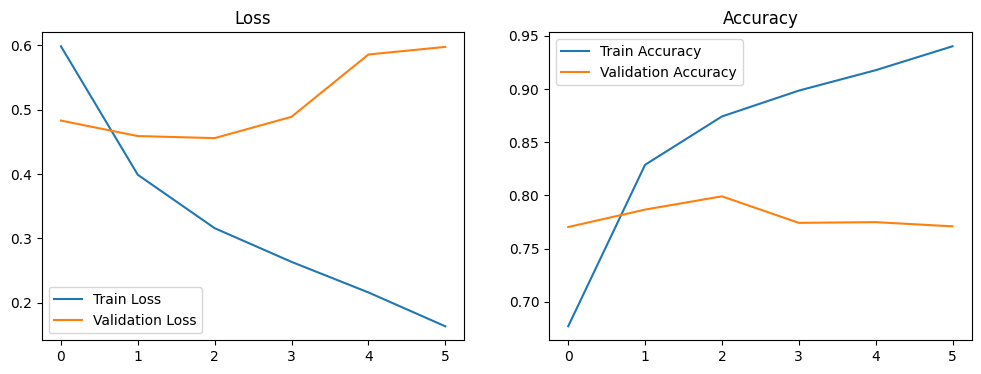

Validation Loss: 0.597189724445343
Validation Accuracy: 0.7708470225334167


In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Evaluate the model on the validation Loss and Accuracy
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Discussion: As epoch increments, we can see train loss and validation loss decrementing which show the models is being improved.

The train loss and accuracy are reaching their peaks which means they cant be improved much futher.

Validation loss and accuracy are stable but they are up and down which is normal.

For example:
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.9400 - loss: 0.1661 - val_accuracy: 0.7708 - val_loss: 0.5972 - learning_rate: 2.0000e-04
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9149 - loss: 0.2331
Train Loss: 0.28406211733818054
Train Accuracy: 0.8895310759544373

The result has been improved significantly compared to the previous models.

### 7. Apply NLP on the test data


#### A. Use the latest model for test data

In [12]:
# Tokenize and pad the test data
X_test_seq = tokenizer.texts_to_sequences(test_data['text'])
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Make predictions on the test data
predictions = model.predict(X_test_pad)
predictions = (predictions > 0.5).astype(int).flatten()

# create a submission dataframe
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': predictions
})

# save submission to cvs file
submission.to_csv('submission.csv', index=False)
print("Finish creating submission csv file!")

102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


#### B. Display plots

In [13]:
# Display some sample results
for i in range(25): 
    print(f"Tweets: {test_data['text'].iloc[i]}")
    print(f"Model Prediction: {predictions[i]}")
    print("-" * 50)

Tweets: just happened a terrible car crash
Model Prediction: 0
--------------------------------------------------
Tweets: heard about earthquake is different cities stay safe everyone
Model Prediction: 1
--------------------------------------------------
Tweets: there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
Model Prediction: 1
--------------------------------------------------
Tweets: apocalypse lighting spokane wildfires
Model Prediction: 1
--------------------------------------------------
Tweets: typhoon soudelor kills 28 in china and taiwan
Model Prediction: 1
--------------------------------------------------
Tweets: we re shaking it s an earthquake
Model Prediction: 1
--------------------------------------------------
Tweets: they d probably still show more life than arsenal did yesterday eh eh
Model Prediction: 0
--------------------------------------------------
Tweets: hey how are you
Model Prediction: 0
------------------------

Discussions: From trainng with test data used the same model that yields the best results. The results show Disaster vs Non Disaster Tweets

### 7. Takeways

In conclusion, the third model yields the best results because it has more epoch and more dense in each layer, and it uses Tokenizer, Padding, bidirectional; therefore, the data goes through a lot iterations which improves accuracy and reduces loss. 

Train Loss: 0.28406211733818054
Train Accuracy: 0.8895310759544373

The loss and result diagrams show the significant trendlines at the begining and they also dont change much at the end. This means the model had peaked and couldnt be improve much more.

What I could improve was cleaning data better, using tokenizer, padding, bidirectional, adjusting learning rate and epoch. 

The results seem to be pretty good with the latest model but there is always room to improve to archive lower loss and higher accuracy.